In [1]:
from financeiro import FinancialSignal, AIFinancial, FinancialData
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fi = FinancialData()
indexes = ["IMAT", "IMOB"]
data = fi.get_data_by_indexes(indexes)

Número total de ativos: 28
INDEX: IMAT	 ATIVOS: 10
INDEX: IMOB	 ATIVOS: 18


In [3]:
train_date = ('2017-10-28', '2019-10-28')
test_date = ('2019-10-28', '2020-10-28')
train, test, volumes = fi.get_data_train_and_test(data, train_date, test_date)

  0%|          | 0/10 [00:00<?, ?it/s]

Get Train Data
FUNDO: IMAT


  0%|          | 0/18 [00:00<?, ?it/s]

FUNDO: IMOB


  0%|          | 0/10 [00:00<?, ?it/s]

Get Test Data
FUNDO: IMAT


  0%|          | 0/18 [00:00<?, ?it/s]

FUNDO: IMOB


100%|██████████| 18/18 [00:18<00:00,  1.02s/it]


In [4]:
list_v = {}
for df in train.keys():
    a = volumes[df].mean().sort_values(ascending=False)[:10]
    list_v[df] = a.keys()
    
for key in train.keys():
    train[key] = train[key][list_v[key]]

In [5]:
train["IMOB"].describe()

,BRML3.SA,TCSA3.SA,MRVE3.SA,CYRE3.SA,MULT3.SA,GFSA3.SA,IGTA3.SA,JHSF3.SA,EVEN3.SA,TEND3.SA
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,11.510391,1.454496,12.472108,14.108505,22.776262,10.238049,37.859892,2.045556,5.985106,15.370278
std,1.708340,0.324401,2.855383,4.321818,3.058003,3.514890,5.315515,0.920389,2.133382,5.099362
min,8.308002,0.900000,9.198236,8.732777,16.638145,4.770000,28.025795,0.963862,2.886842,7.892261
25%,10.394234,1.270000,10.300169,10.721158,20.929253,6.706050,34.802734,1.459830,4.501515,11.832469
50%,11.492737,1.340000,11.455190,12.679408,22.695371,10.414400,37.578381,1.777997,5.675824,13.714342
75%,12.577978,1.592500,13.386731,15.547363,24.700676,12.175675,41.099011,2.371343,6.282550,17.853353
max,15.350000,2.350000,21.247185,24.685970,29.305798,18.582600,49.713509,4.533364,11.782228,26.568163


In [8]:
dfs = []
for key in train.keys():
    dfs.append(train[key])

result = pd.concat(dfs)

  0%|          | 0/2 [00:00<?, ?it/s]

Segmentacao de dados antes: 
Segmentacao de dados antes: 


 50%|█████     | 1/2 [00:01<00:01,  1.18s/it]

Ativos com Melhor Relação em Cada Cluster: ['VALE3.SA']
['VALE3.SA']
Segmentacao de dados antes: 
Segmentacao de dados antes: 


100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

Ativos com Melhor Relação em Cada Cluster: ['TEND3.SA']
['TEND3.SA']


[('IMAT', ('VALE3.SA', -0.16281650622281627)),
 ('IMOB', ('TEND3.SA', -0.13489344080321852))]

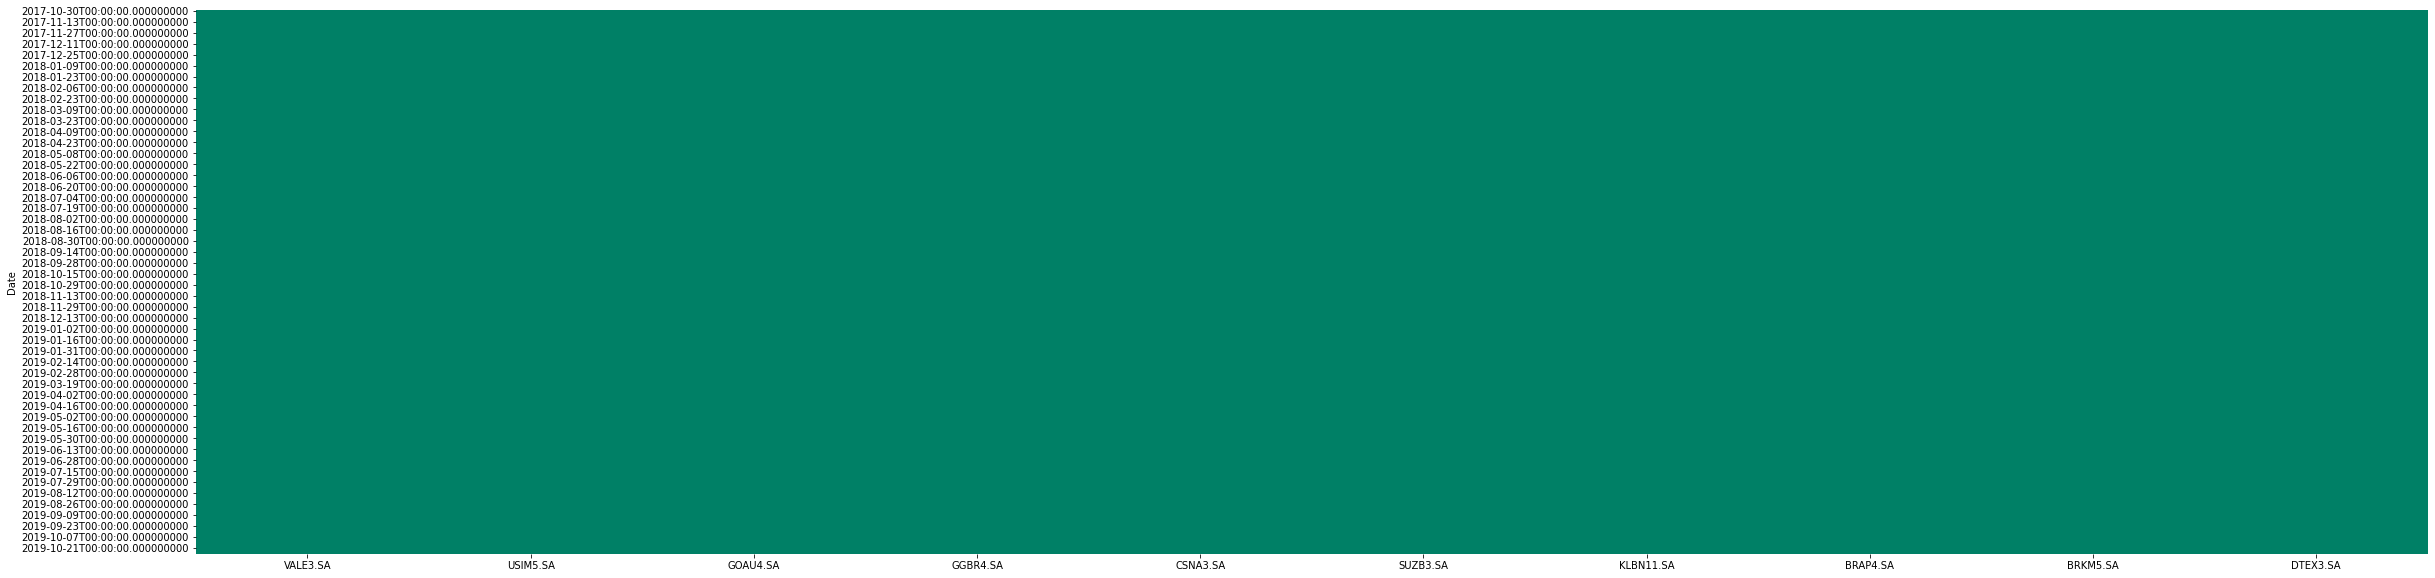

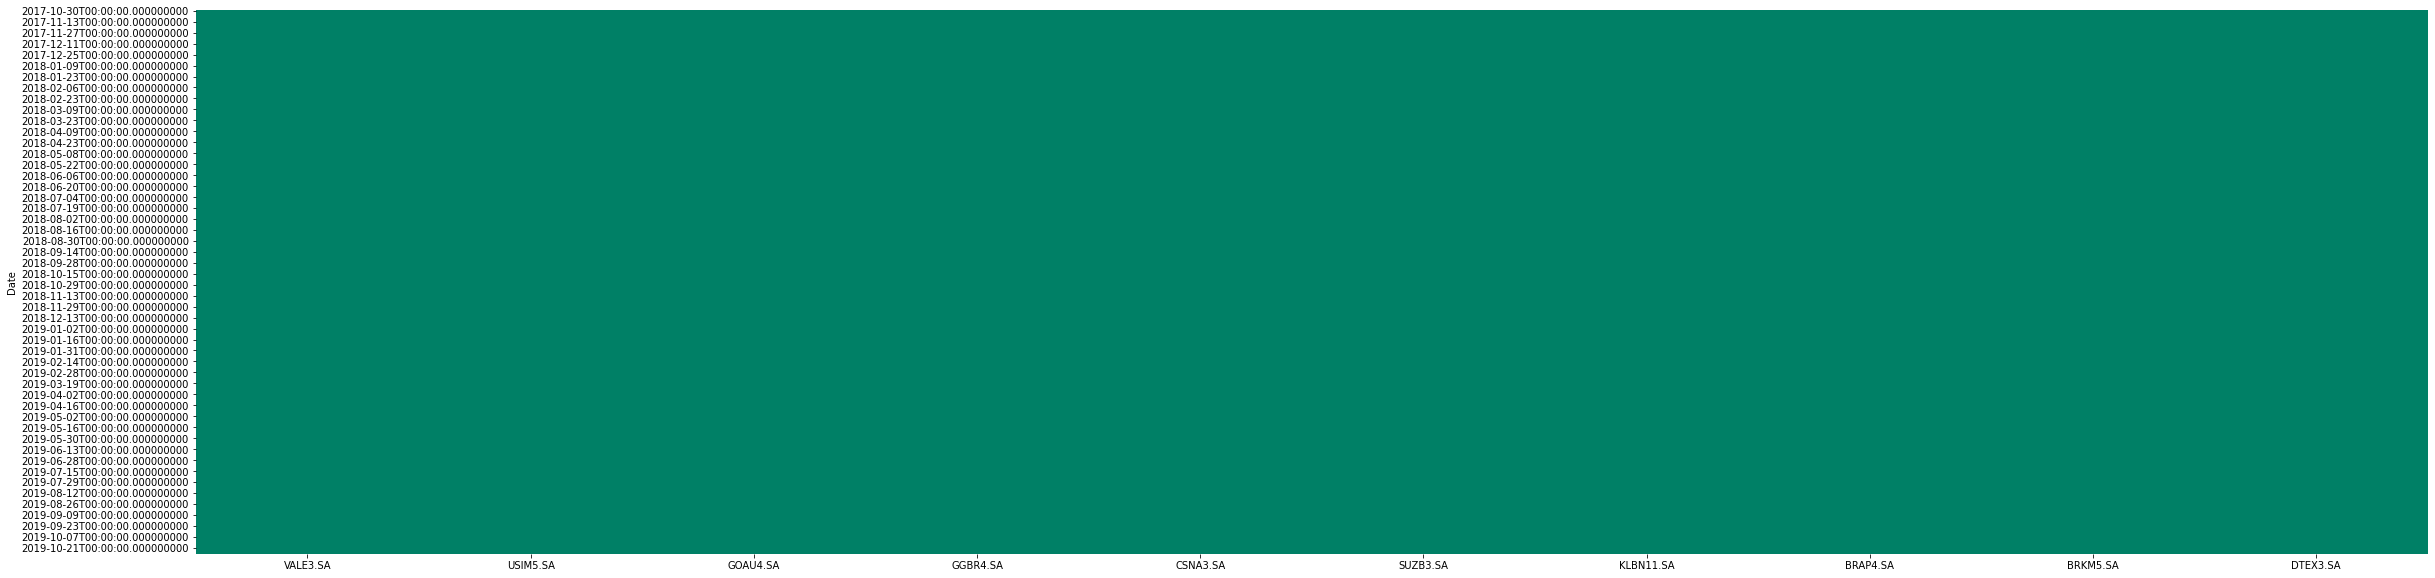

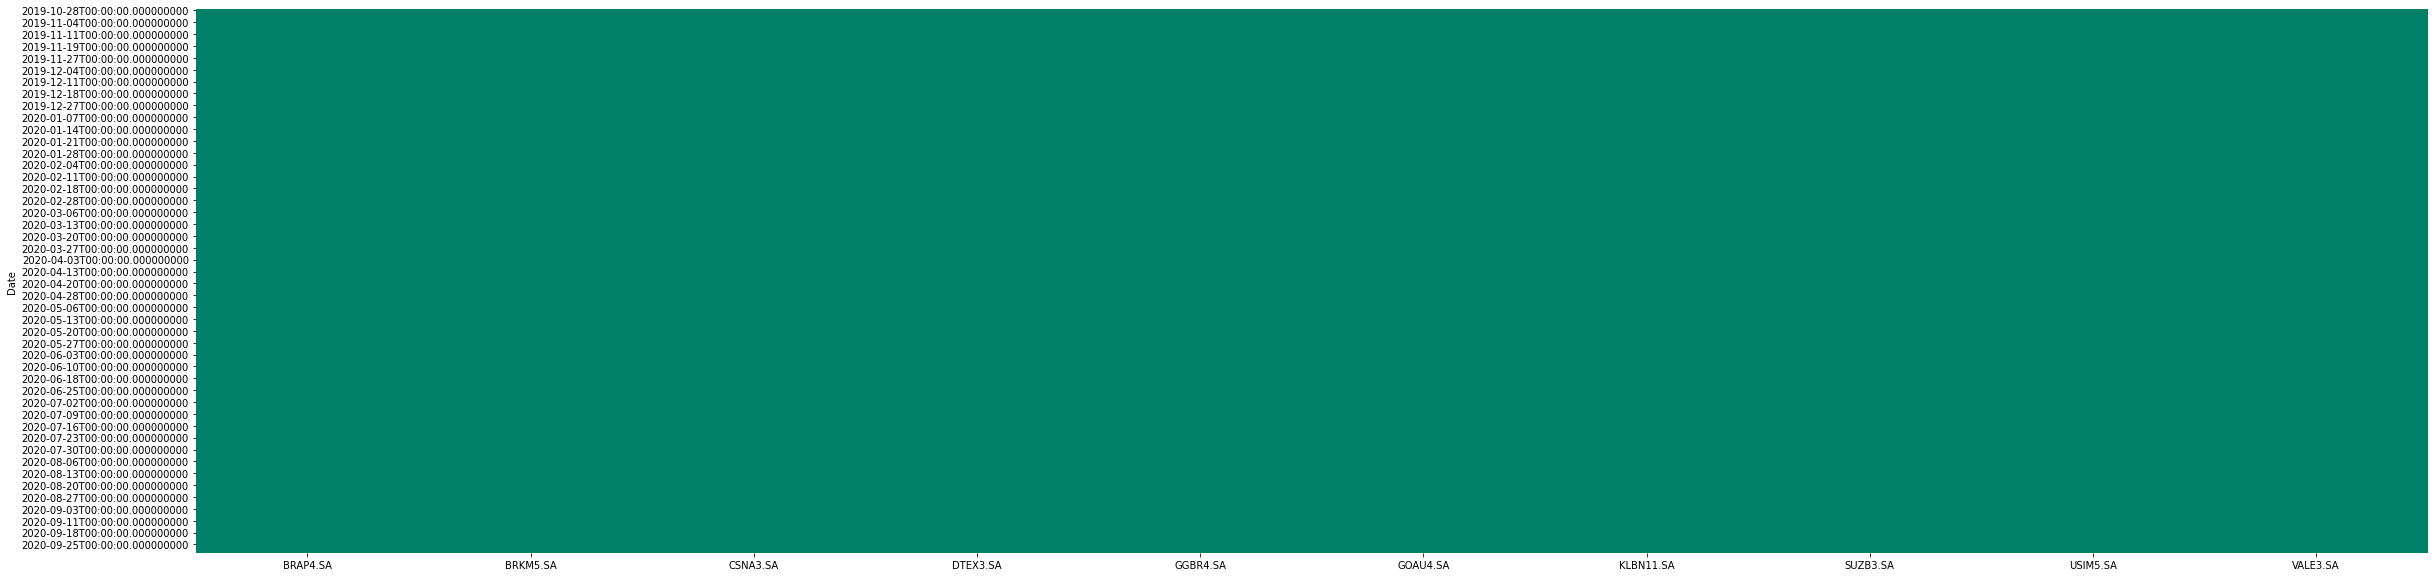

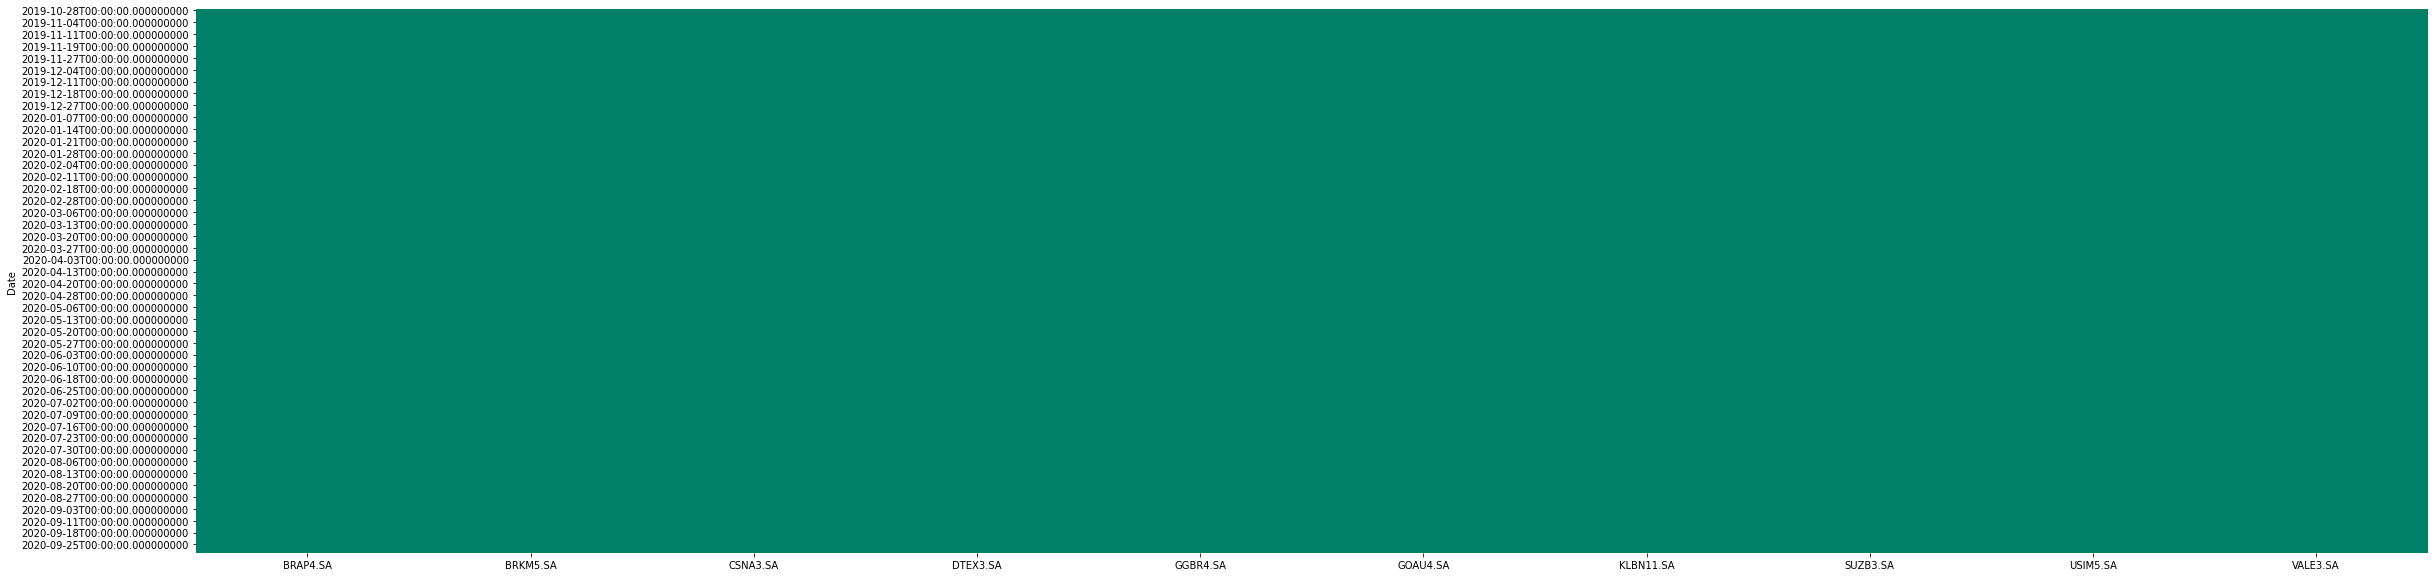

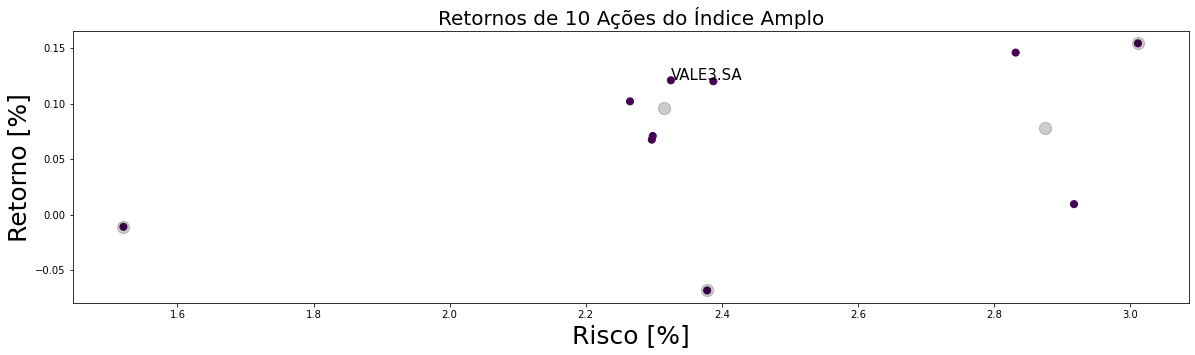

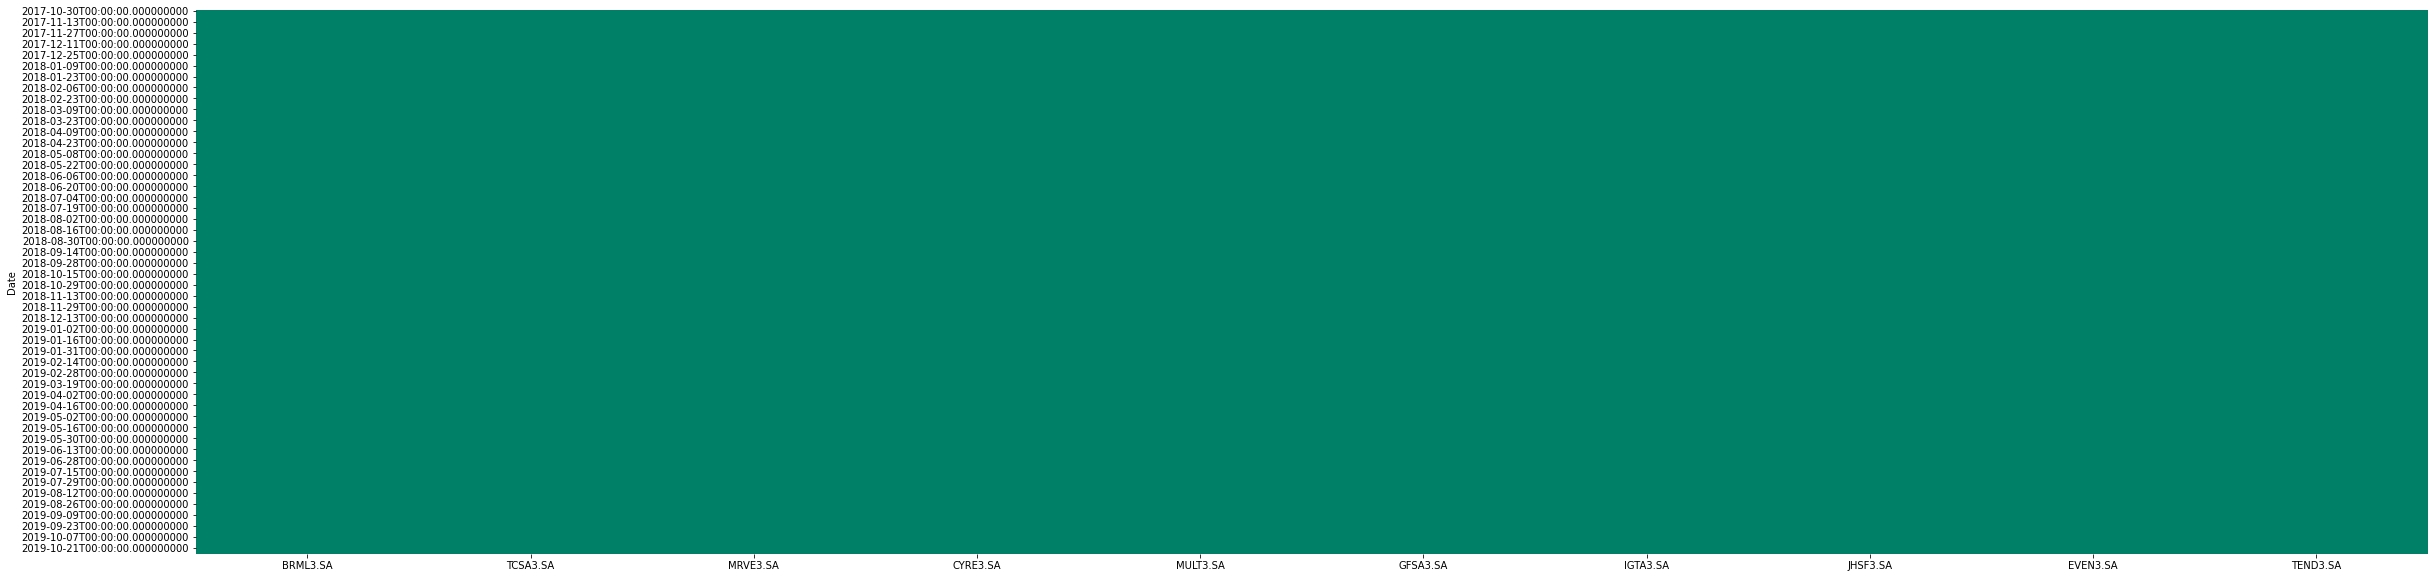

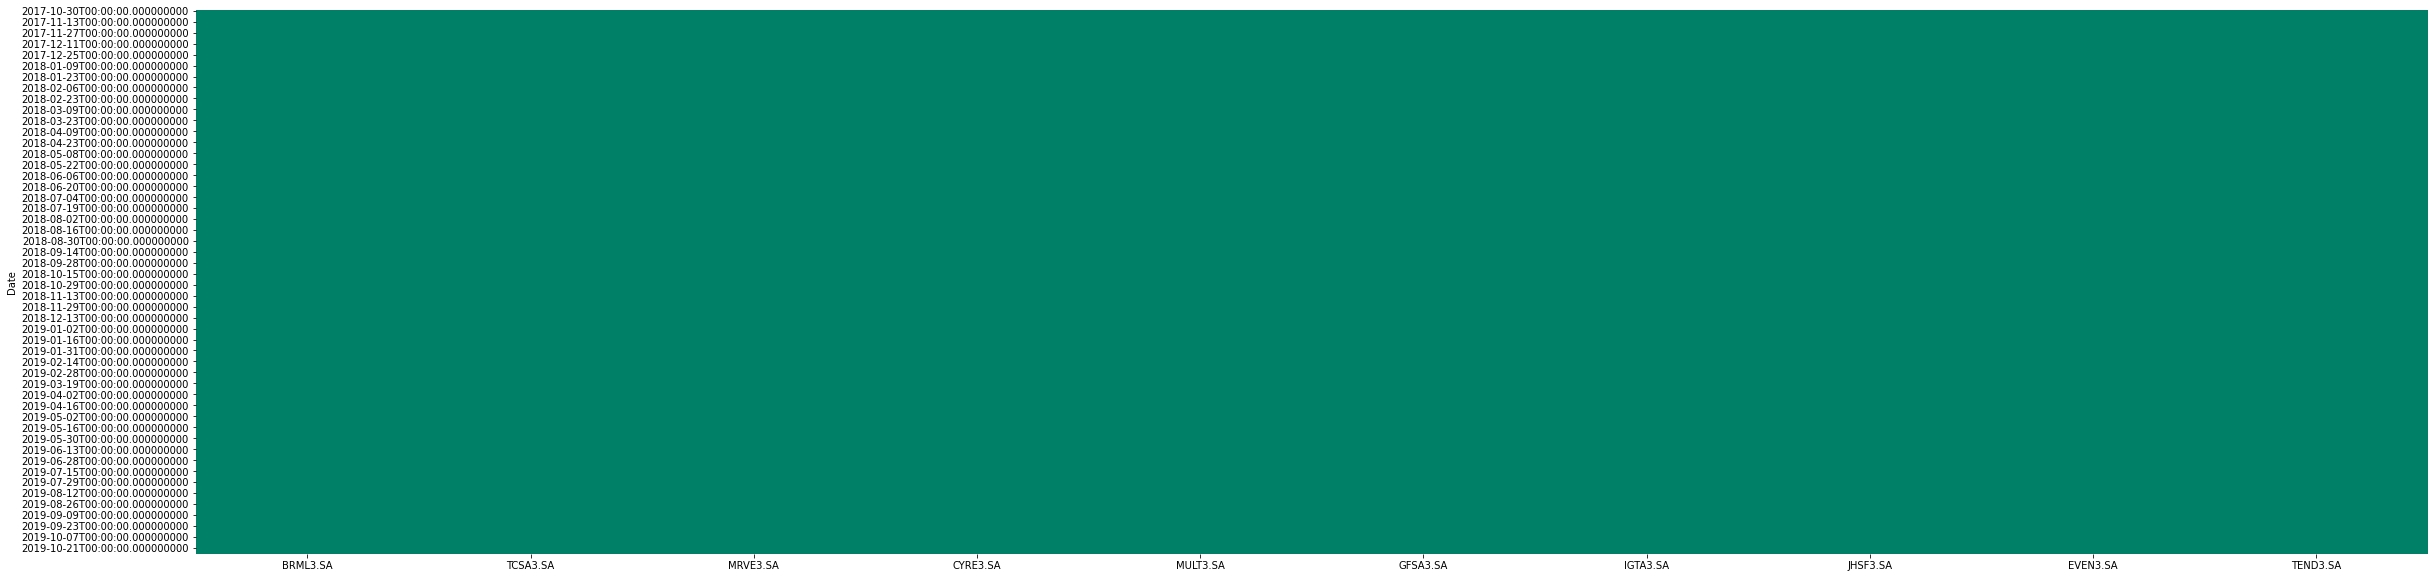

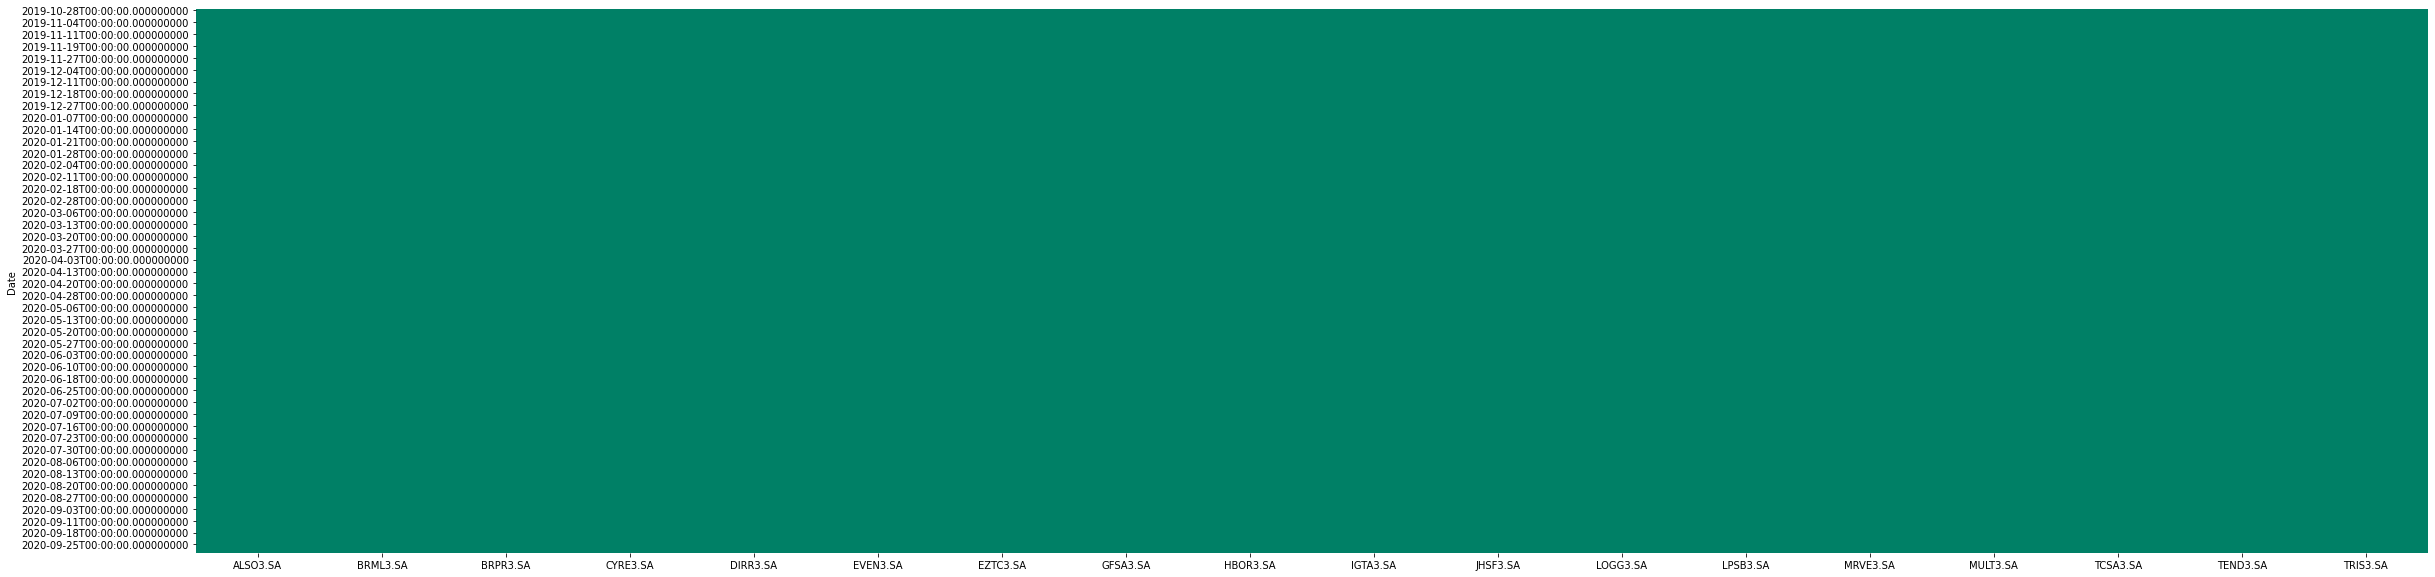

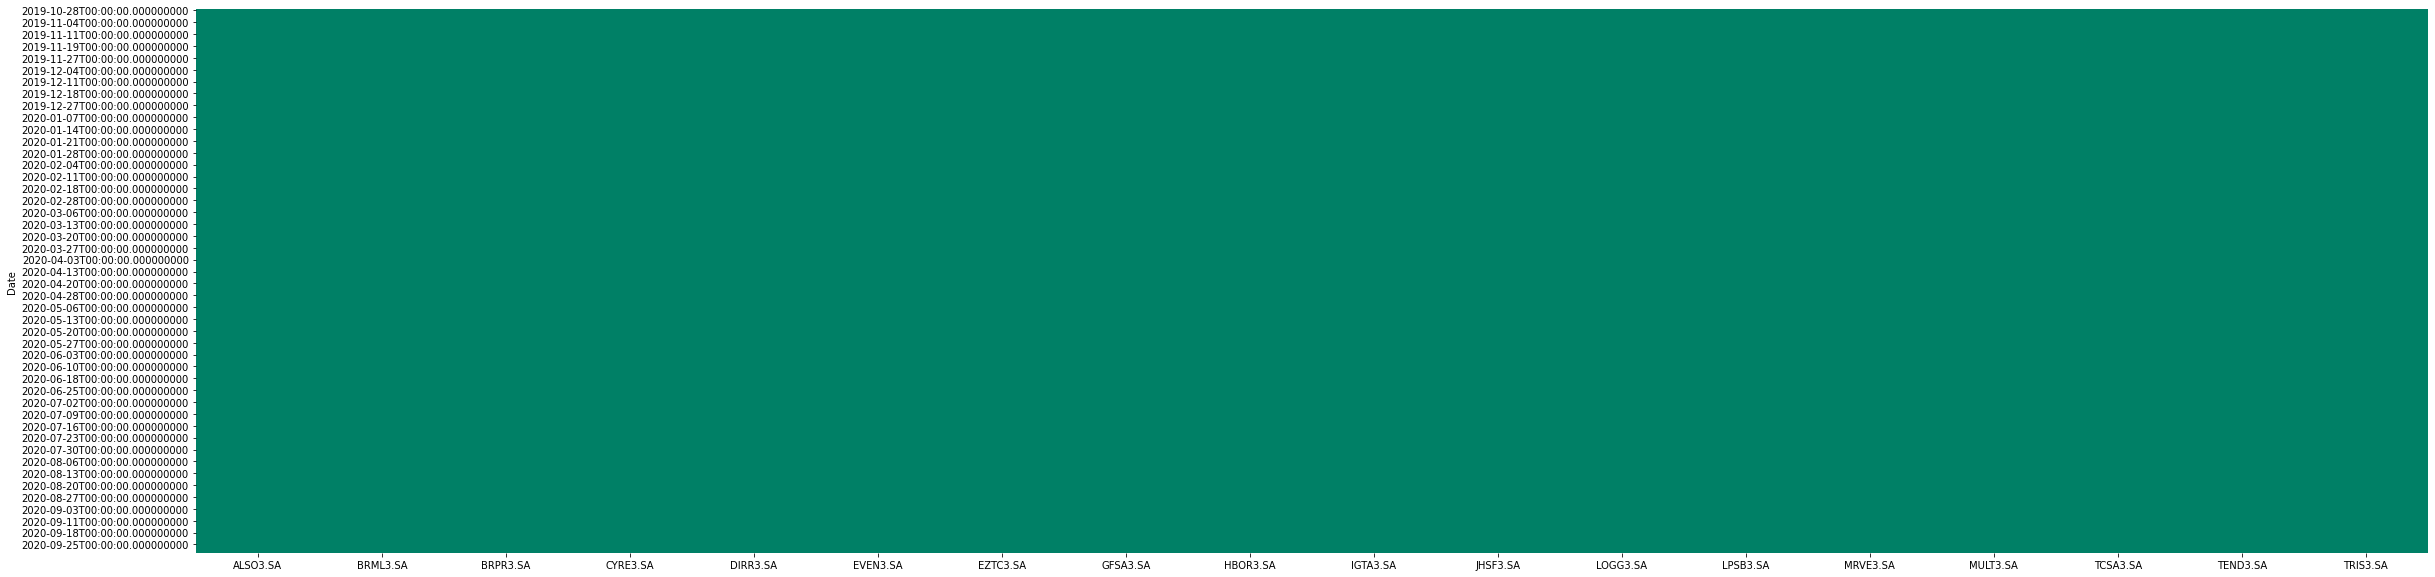

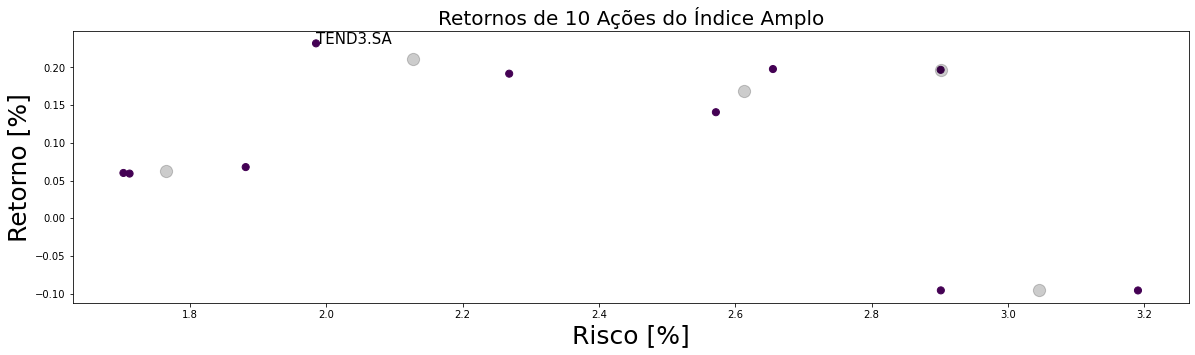

In [13]:
from tqdm import tqdm
bestes = []
for index in tqdm(indexes):
    best = fi.get_best_actives(train[index], test[index], 5, index)
    bestes.append(best)
bestes

In [12]:
bestes

[('IMAT', ('IMAT', ('VALE3.SA', -0.16281650622281627))),
 ('IMOB', ('IMOB', ('TEND3.SA', -0.13489344080321852)))]